### <div class="alert alert-block alert-info"> [Part1] 미디어파이프를 이용한 얼굴인식
- face_detection을 이용하여서 얼굴의 6가지 랜드마크를 인식합니다. (눈2, 코,입, 귀2)

In [5]:
!pip install opencv-python

     ---------------------------------------- 38.6/38.6 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 14.0/14.0 MB 9.2 MB/s eta 0:00:00


anaconda 관리자 실행  
conda activate mp   
pip install --user mediapipe

In [20]:
!pip show mediapipe

Name: mediapipe
Version: 0.9.0.1
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: c:\users\bluecom014\appdata\roaming\python\python37\site-packages
Requires: absl-py, attrs, flatbuffers, matplotlib, numpy, opencv-contrib-python, protobuf
Required-by: 


In [16]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=['./img/sample.jpg']

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=1, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        results=face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
              
        if not results.detections:
            print("Face not found in image")
        else: 
            print(len(results.detections))
            print(results.detections)
           
   

2
[label_id: 0
score: 0.8429038524627686
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.40623968839645386
    ymin: 0.27737605571746826
    width: 0.07183575630187988
    height: 0.10767686367034912
  }
  relative_keypoints {
    x: 0.42865097522735596
    y: 0.30971527099609375
  }
  relative_keypoints {
    x: 0.45559221506118774
    y: 0.3098941445350647
  }
  relative_keypoints {
    x: 0.4391864538192749
    y: 0.3332650661468506
  }
  relative_keypoints {
    x: 0.44185671210289
    y: 0.35496944189071655
  }
  relative_keypoints {
    x: 0.4193357527256012
    y: 0.324726402759552
  }
  relative_keypoints {
    x: 0.47998714447021484
    y: 0.32117992639541626
  }
}
, label_id: 0
score: 0.7307496666908264
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.2537979483604431
    ymin: 0.29274868965148926
    width: 0.08250665664672852
    height: 0.1237339973449707
  }
  relative_keypoints {
    x: 0.28104448

### <div class="alert alert-block alert-info"> [Part2] 인식된 얼굴에 박스를 그림
- 근거리 원거리에 대하여서 

0-->./img\dog.png:1count


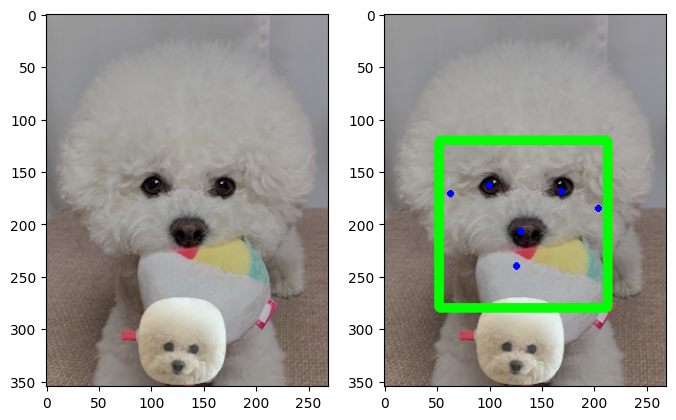

1-->./img\long.png:Face not found in image
2-->./img\sample.jpg:Face not found in image
3-->./img\short.jpg:1count


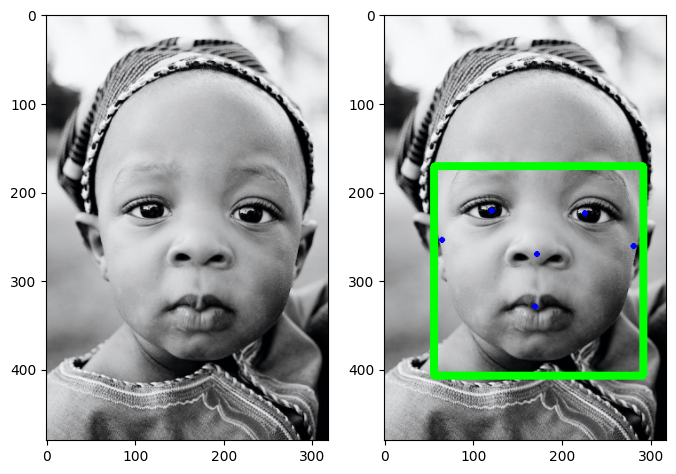

In [3]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from glob import glob

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=glob('./img/*.*')

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=0, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results=face_detection.process(image)
       
              
        if not results.detections:

            print(str(idx) + '-->'+ file + ':Face not found in image')
            
        else: 
            print(str(idx) + '-->'+  file + ':'+ str(len(results.detections)) + 'count')
            annotated_image = image.copy()
            for detection in results.detections:
                mp_drawing.draw_detection(annotated_image, detection, 
                                          bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
        
            plt.figure(figsize=(8,20))
            plt.subplot(1,2,1);plt.imshow(image)
            plt.subplot(1,2,2);plt.imshow(annotated_image)
            plt.show()
            
            
           

### <div class="alert alert-block alert-info"> [Part2] 눈,코,입,귀등 포인트 위치값 출력
- 

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=['./img/short.jpg']

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=0, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        results=face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
              
        if not results.detections:
            print("Face not found in image")
        else: 
            print(len(results.detections)) # 얼굴인식 갯수 출력
            
            for detection in results.detections:
                    
                    for x in detection.location_data.relative_keypoints:
                        print('-'*50)
                        print(x)
                    
                

1
--------------------------------------------------
x: 0.3815946877002716
y: 0.46129289269447327

--------------------------------------------------
x: 0.7119122743606567
y: 0.4675918221473694

--------------------------------------------------
x: 0.5428836345672607
y: 0.5638480186462402

--------------------------------------------------
x: 0.5366237163543701
y: 0.6869577765464783

--------------------------------------------------
x: 0.20462587475776672
y: 0.5311298966407776

--------------------------------------------------
x: 0.885663628578186
y: 0.544664204120636



### <div class="alert alert-block alert-info"> [Part3] FaceKeyPoint를 이용하여 지정한 객체값 위치만 출력

In [6]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=['./img/short.jpg']
xList=['RIGHT_EYE','LEFT_EYE','NOSE_TIP','MOUTH_CENTER','RIGHT_EAR_TRAGION','LEFT_EAR_TRAGION']

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=0, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        results=face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
              
        if not results.detections:
            print("Face not found in image")
        else: 
            print(len(results.detections)) # 얼굴인식 갯수 출력
            
            for x in range(6):
                print('-->'+ xList[x])
                print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint(x)))  
             
            

1
-->RIGHT_EYE
x: 0.3815946877002716
y: 0.46129289269447327

-->LEFT_EYE
x: 0.7119122743606567
y: 0.4675918221473694

-->NOSE_TIP
x: 0.5428836345672607
y: 0.5638480186462402

-->MOUTH_CENTER
x: 0.5366237163543701
y: 0.6869577765464783

-->RIGHT_EAR_TRAGION
x: 0.20462587475776672
y: 0.5311298966407776

-->LEFT_EAR_TRAGION
x: 0.885663628578186
y: 0.544664204120636



### <div class="alert alert-block alert-info"> [Part4] 웹캠으로 지정하기
- 

In [21]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

dataList=[]
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:
  
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      continue

   
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)

  
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(image, detection)
   
    cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
    
    dataList.append(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint(x)))  
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
      cap.release() 
      cv2.destroyAllWindows()
      break